<a href="https://colab.research.google.com/github/alfie-agustin/Analisis-predictivo/blob/main/Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Falta

 - Como ordenar la exposicion
 - arrancar la explicacion
 - Analisis outliers
 - optimizar modelos


***Hipotesis:***

1) La marca va a influenciar al precio

2) El tamaño de motor y caballos (cuanto mas) mas va a subir el precio

3) el tamaño del auto va a influenciar en el precio

4) el tipo de nafta va a influenciar en el precio








In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os as os
import scipy.stats as stats

In [154]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [155]:
df = pd.read_csv('gdrive/My Drive/2022/Analisis predictivo/pricepred/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [156]:
import random
random.seed(8)

In [157]:
df.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [158]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [159]:
df.isnull().values.any()

False

In [160]:
df[['Marca','Modelo']] = df.CarName.apply(lambda x: pd.Series(str(x).split(" ", 1)))

In [161]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca,Modelo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [162]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [163]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [164]:
df.Marca.unique()



array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [165]:
df.loc[df['Marca'] == "Nissan", 'Marca'] = 'nissan'
df.loc[df['Marca'] == "maxda", 'Marca'] = 'mazda'
df.loc[df['Marca'] == "vokswagen", 'Marca'] = 'volkswagen'
df.loc[df['Marca'] == "vw", 'Marca'] = 'volkswagen'
df.loc[df['Marca'] == "porcshce", 'Marca'] = 'porsche'
df.loc[df['Marca'] == "toyouta", 'Marca'] = 'toyota'


In [166]:
df.Marca.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#Dummisar variable

In [167]:
import numpy as np
import pandas as pd

df['nissan'] = np.where(df['Marca']=='nissan', 1, 0)
df['mazda'] = np.where(df['Marca']=='mazda', 1, 0)
df['volkswagen'] = np.where(df['Marca']=='volkswagen', 1, 0)
df['porsche'] = np.where(df['Marca']=='porsche', 1, 0)
df['toyota'] = np.where(df['Marca']=='toyota', 1, 0)
df['alfa-romeo'] = np.where(df['Marca']=='alfa-romero', 1, 0)
df['audi'] = np.where(df['Marca']=='audi', 1, 0)
df['bmw'] = np.where(df['Marca']=='bmw', 1, 0)
df['chevrolet'] = np.where(df['Marca']=='chevrolet', 1, 0)
df['dodge'] = np.where(df['Marca']=='dodge', 1, 0)
df['honda'] = np.where(df['Marca']=='honda', 1, 0)
df['isuzu'] = np.where(df['Marca']=='isuzu', 1, 0)
df['jaguar'] = np.where(df['Marca']=='jaguar', 1, 0)
df['buick'] = np.where(df['Marca']=='buick', 1, 0)
df['mercury'] = np.where(df['Marca']=='mercury', 1, 0)
df['mitsubishi'] = np.where(df['Marca']=='mitsubishi', 1, 0)
df['peugot'] = np.where(df['Marca']=='peugot', 1, 0)
df['plymouth'] = np.where(df['Marca']=='plymouth', 1, 0)
df['renault'] = np.where(df['Marca']=='renault', 1, 0)
df['saab'] = np.where(df['Marca']=='saab', 1, 0)
df['subaru'] = np.where(df['Marca']=='subaru', 1, 0)
df['volvo'] = np.where(df['Marca']=='volvo', 1, 0)


df.drop(columns=['Marca'],axis=1,inplace=True)

In [168]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [169]:
df['convertible'] = np.where(df['carbody']=='convertible', 1, 0)
df['hatchback'] = np.where(df['carbody']=='hatchback', 1, 0)
df['sedan'] = np.where(df['carbody']=='sedan', 1, 0)
df['wagon'] = np.where(df['carbody']=='wagon', 1, 0)
df['hardtop'] = np.where(df['carbody']=='hardtop', 1, 0)


df.drop(columns=['carbody'],axis=1,inplace=True)

In [170]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [171]:
df['rwd'] = np.where(df['drivewheel']=='rwd', 1, 0)
df['fwd'] = np.where(df['drivewheel']=='fwd', 1, 0)
df['4wd'] = np.where(df['drivewheel']=='4wd', 1, 0)


df.drop(columns=['drivewheel'],axis=1,inplace=True)

In [172]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [173]:
df['two'] = np.where(df['doornumber']=='two', 1, 0)
df['four'] = np.where(df['doornumber']=='four', 1, 0)

df.drop(columns=['doornumber'],axis=1,inplace=True)

In [174]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [175]:
df['front'] = np.where(df['enginelocation']=='front', 1, 0)
df['rear'] = np.where(df['enginelocation']=='rear', 1, 0)

df.drop(columns=['enginelocation'],axis=1,inplace=True)

#DISTRIBUCION DE VARIABLES

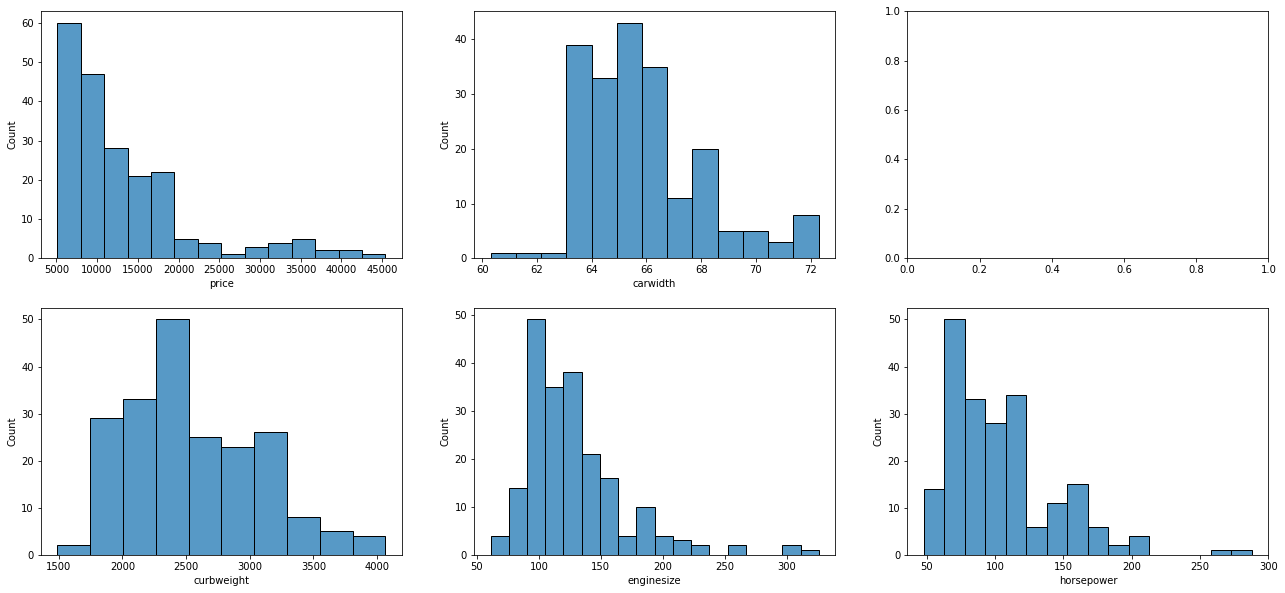

In [176]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

sns.histplot(data=df, x="price", ax=axs[0,0],multiple="stack")
sns.histplot(data=df, x="carwidth",  ax=axs[0,1],multiple="stack")
sns.histplot(data=df, x="curbweight",  ax=axs[1,0],multiple="stack")
sns.histplot(data=df, x="enginesize", ax=axs[1,1],multiple="stack")
sns.histplot(data=df, x="horsepower", ax=axs[1,2],multiple="stack")
plt.show()

#TEST DE NORMALIDAD PARA VARIABLE RESPUESTA


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


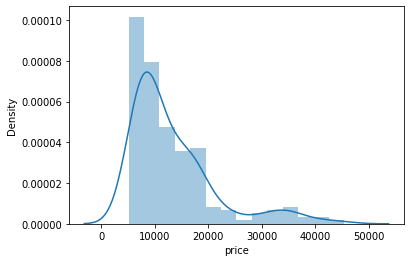

In [177]:
sns.distplot(df.price) 

In [178]:
from scipy.stats import shapiro

stat, p = shapiro(df.price)

print('stat: ', stat)
print('p value:', p)

if p > 0.05:
  print('probability gaussin')
else:
  print('probability not gaussian')  



stat:  0.8006654381752014
p value: 1.8491777441833604e-15
probability not gaussian


***CORRELACIONES***


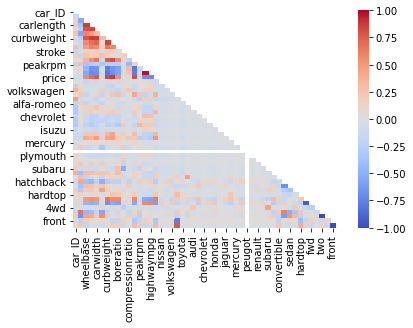

In [179]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = False
            , cmap = 'coolwarm', mask = mask)

#se puede ver una posible relacioin entre el precio con el ancho del auto, el peso, el tamaño de motor y los caballos de fuerza

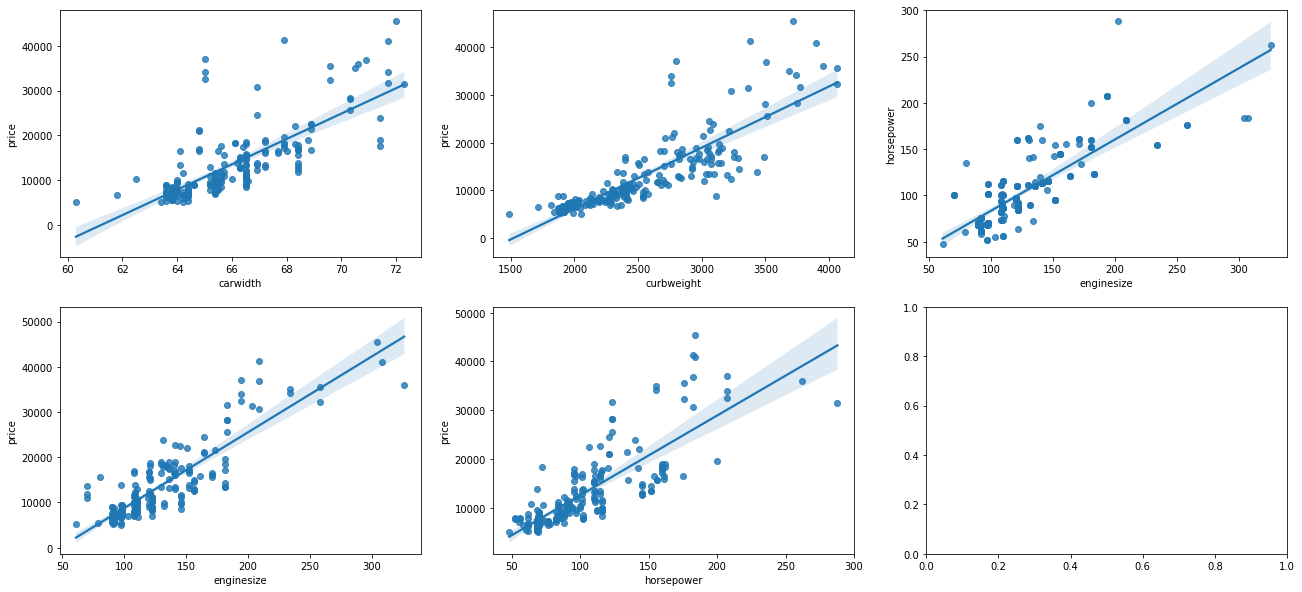

In [180]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

# Ponerle las correlaciones como titulos 

sns.regplot(x = df.carwidth, y = df.price, ax=axs[0,0], )
sns.regplot(x = df.curbweight, y = df.price, ax=axs[0,1])
sns.regplot(x = df.enginesize, y = df.horsepower, ax=axs[0, 2])

sns.regplot(x = df.enginesize, y = df.price, ax = axs[1,0])
sns.regplot(x = df.horsepower, y = df.price, ax = axs[1,1])
plt.show()

***SCATTER PLOTS PARA ENTENDER MEJOR EL TIPO DE CORR***

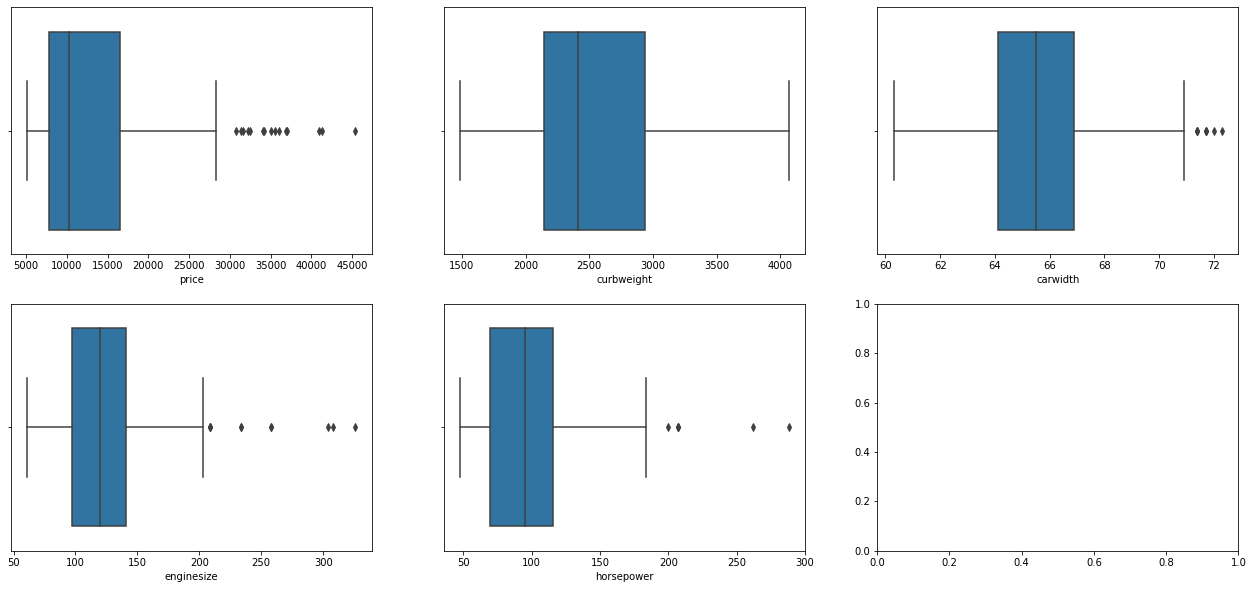

In [181]:
#ANALISIS OUTLIERS

fig, axs = plt.subplots(2,3, figsize=(22, 10))



sns.boxplot(x=df.price, ax=axs[0,0]) 
sns.boxplot(x=df.carwidth, ax=axs[0,2])
sns.boxplot(x=df.curbweight, ax=axs[0,1])
sns.boxplot(x=df.enginesize, ax = axs[1,0])
sns.boxplot(x=df.horsepower, ax = axs[1,1])
plt.show()




CATEGORICAS VS PRECIO, H

<BarContainer object of 205 artists>

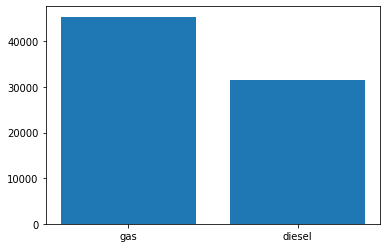

In [182]:
plt.bar(df.fueltype, df.price, )

#los autos que usan diesel valen un 25% menos

<BarContainer object of 205 artists>

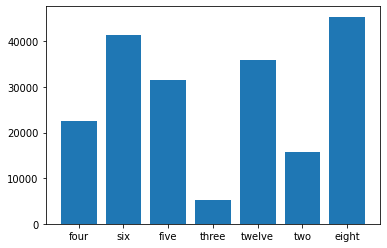

In [183]:
plt.bar(df.cylindernumber, df.price)
# no se ve una relacion constante

In [212]:
#info = df[["Marca", "price"]].groupby("Marca").agg(["mean", "count"]) 
#info
# ver como ordenar por el mean y despues hacer un grafico del head, hacer rango precio ystat stuff para explicar q la marca influye (ej comparacion toyota con buick (mayor ventas va mayor precio prom))

# RETOCAR!!!! Grafico tela de araña para top 3 modelos mas vendidos 
- podria hacer una funcoin que vaya por todos los auto
- agarrar cada auto de cada marca (el mas caro y el mas barato) y graficar las telas de araña una al lado dee la orta


info_tela_araña = df.groupby("Marca")

info_tela_araña["Marca"] # hay que imprimirlo, y por marca (Dentro dl top 5), 

hacer el grafico  hacer un max min de cada marca


- deberia hacer las listas angulos y porcentajes para el auto mas caro y mas barato de cada marca o almenos top 3/5

- Porcentaje:
    - porcenentaaje d influencia de cada variable sobre el total de las variables, es decir, los autos tienen x variabls numericas, esas variables representan un 100% del auto, cada variable tine un % que la representa sobre el total
    - angulos:

    Variables_01=sql01["Variable"]

    Porcentaje_01=sql01["P"] #llama a la funcion de group by de las listas, esa la armo yo con un group by como el de arriab (bien hecho)

    n_01=len(Variables_01) #cantidad de variaablees creo

    Angulos_01=[i/n_01 * 2 * np.pi for i in range(n_01)] #funcion para conseguir el angulo

fig=figure(figsize=(20,10), dpi=120)

ax1=plt.subplot(1, 2, 1 , polar=True)

plt.polar(Angulos_01, Porcentaje_01, c='magenta', linewidth=2)

ax1.fill(Angulos_01, Porcentaje_01, 'magenta', alpha=0.1)

ax1.set_ylim (0, 58)

plt.xticks(Angulos_01[:-1], Variables_01, color='black', size=16)

plt.title("Insertar modelo", fontsize=20)


ax2=plt.subplot(1, 2, 2 , polar=True)

plt.polar(Angulos_02, Porcentaje_02, c='magenta', linewidth=2)

ax2.fill(Angulos_02, Porcentaje_02, 'magenta', alpha=0.1)

ax2.set_ylim (0, 35)

plt.xticks(Angulos_02[:-1], Variables_02, color='black', size=16)

plt.title("Insertar modelo", fontsize=20)

plt.suptitle("01. Viajeros_Full \n\n " ,fontsize=40)

plt.savefig("Potencia_Viajera_Galicia_01.png", dpi=500) --> no me sirve a mi

plt.show()

#Regresion lineal


In [188]:
df_regresion = df[[
"wheelbase",
"carlength",
"carwidth",
"carheight",
"curbweight",
"enginesize",
"boreratio",
"stroke",
"compressionratio",
"horsepower",
"peakrpm",
"citympg",
"highwaympg",
'alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop','rwd', 'fwd', '4wd','two', 'four', 'front', 'rear',
"price"]]

In [189]:
from sklearn.model_selection import train_test_split

x = df_regresion.drop(columns = ['price']).copy()
y = df_regresion['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20 )

print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(164, 47)
(164,)
(41, 47)
(41,)


(None, None)

In [190]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

regresion.fit(x_train, y_train)

LinearRegression()

In [191]:
pred = regresion.predict(x_test)

In [192]:
from sklearn import metrics
R2_regre = metrics.r2_score(y_test1, pred_arbol)
MSE_regre = metrics.mean_squared_error(y_test1, pred_arbol)

print("R2: ", R2_regre)
print("MSE: ", MSE_regre)
#meterle mas metricas y compaarar

R2:  0.9553224647763444
MSE:  2323247.93902439


[Text(0.5, 1.0, 'y_test vs y_pred')]

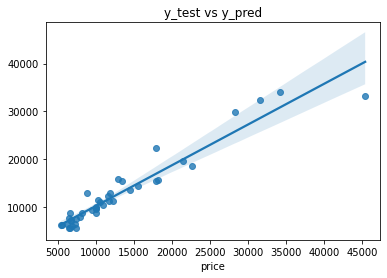

In [193]:
sns.regplot(x = y_test, y = pred).set(title = "y_test vs y_pred")

#Arbol regresion

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

- hay que optimizarlo, meterle max depth y la bola, igual 0,9 esta bastane bien

In [194]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
base_arbol = df[[
"wheelbase",
"carlength",
"carwidth",
"carheight",
"curbweight",
"enginesize",
"boreratio",
"stroke",
"compressionratio",
"horsepower",
"peakrpm",
"citympg",
"highwaympg",
'alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop','rwd', 'fwd', '4wd','two', 'four', 'front', 'rear',
"price"]]

In [205]:
x1 = base_arbol.drop(columns = ['price']).copy()
y1 = base_arbol['price']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.20 )

print(x_train1.shape), print(y_train1.shape)
print(x_test1.shape), print(y_test1.shape)

(164, 47)
(164,)
(41, 47)
(41,)


(None, None)

In [206]:
x_train1.dtypes

wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
alfa-romeo            int64
audi                  int64
bmw                   int64
chevrolet             int64
dodge                 int64
honda                 int64
isuzu                 int64
jaguar                int64
mazda                 int64
buick                 int64
mercury               int64
mitsubishi            int64
nissan                int64
peugot                int64
plymouth              int64
porsche               int64
renault               int64
saab                  int64
subaru                int64
toyota                int64
volkswagen            int64
volvo                 int64
convertible         

[Text(0.7469202898550724, 0.9666666666666667, 'X[5] <= 182.0\nsquared_error = 55379800.881\nsamples = 164\nvalue = 12940.224'),
 Text(0.5489130434782609, 0.9, 'X[4] <= 2701.0\nsquared_error = 20857265.703\nsamples = 152\nvalue = 11306.126'),
 Text(0.30289855072463767, 0.8333333333333334, 'X[4] <= 2332.5\nsquared_error = 6720511.313\nsamples = 104\nvalue = 8866.904'),
 Text(0.14057971014492754, 0.7666666666666667, 'X[11] <= 29.5\nsquared_error = 1702225.334\nsamples = 64\nvalue = 7425.547'),
 Text(0.050724637681159424, 0.7, 'X[12] <= 29.5\nsquared_error = 1040607.886\nsamples = 22\nvalue = 8624.5'),
 Text(0.017391304347826087, 0.6333333333333333, 'X[2] <= 64.1\nsquared_error = 927728.667\nsamples = 3\nvalue = 10291.0'),
 Text(0.011594202898550725, 0.5666666666666667, 'X[4] <= 2243.0\nsquared_error = 116281.0\nsamples = 2\nvalue = 9639.0'),
 Text(0.005797101449275362, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 9980.0'),
 Text(0.017391304347826087, 0.5, 'squared_error = 0.0\nsamples 

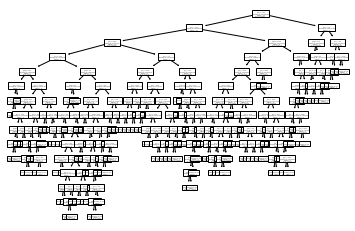

In [207]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#como lo pongo una seed?
arbol = DecisionTreeRegressor()
arbol.fit(x_train1, y_train1)

tree.plot_tree(arbol)

In [208]:
#Prediccion y score
pred_arbol = arbol.predict(x_test1)

In [209]:
print(pred_arbol.shape)
print(y_test1.shape)

(41,)
(41,)


In [210]:
from sklearn import metrics
R2_arbol = metrics.r2_score(y_test1, pred_arbol)
MSE_arbol = metrics.mean_squared_error(y_test1, pred_arbol)

print("R2: ", R2_arbol)
print("MSE: ", MSE_arbol) # pregeuntar si dio bien, porque es muy grande

R2:  0.8562851035714932
MSE:  13475931.146341464


[Text(0.5, 1.0, 'y_test vs y_pred')]

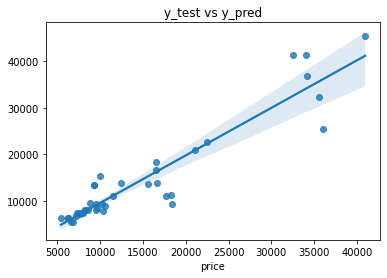

In [211]:
sns.regplot(x = y_test1, y = pred_arbol).set(title = "y_test vs y_pred")